In [5]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import IPython.display as ipd

In [6]:
# Load the image
gambar_path = "C:/Users/aqilw/Paramarta.AI/Achmad Fauzi Wongsojudo/Images/FAHAM/BARU/1.png"
gambar = cv2.imread(gambar_path)
gambar_rgb = cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB)

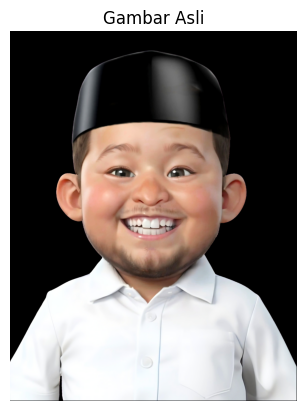

In [7]:
# Display the original image
plt.imshow(gambar_rgb)
plt.axis('off')
plt.title("Gambar Asli")
plt.show()

In [8]:
# Load Dlib's pre-trained face detector and shape predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")  # Pastikan Anda memiliki file shape_predictor_68_face_landmarks.dat

# Deteksi wajah dan landmark wajah
detections = detector(gambar, 1)
for detection in detections:
    shape = predictor(gambar, detection)
    for i in range(68):
        x, y = shape.part(i).x, shape.part(i).y
        cv2.circle(gambar_rgb, (x, y), 2, (0, 255, 0), -1)

# Display the image with landmarks
plt.imshow(gambar_rgb)
plt.axis('off')
plt.title("Landmark Wajah")
plt.show()

RuntimeError: Unable to open shape_predictor_68_face_landmarks.dat